# Tensorflow and Keras

## Modeling

Let's review some modeling concepts we've used to date with [this quick exercise](https://forms.gle/yrPxUp2Xj4R9FeyEA)


We do this to remind ourselves that the basic components of good modeling practice, and even the methods themselves, are _the same_ with Neural Nets as that are with _sklearn_ or _statsmodels_.

## Objectives:
- hands on practice defining two separate NN
- Compare pros and cons of Keras vs TensorFlow

### Think, Pair, Share Challenge:

<img src="https://images.pexels.com/photos/1350560/pexels-photo-1350560.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" alt="diabetes" style ="text-align:center;width:250px;float:none" ></br>

We want to see if we can predict diabetes from input variables

#### What type of problem is this?


Here is the code to grab the dataset. Please use `pandas` to answer some of the questions:
```
import pandas as pd
df = pd.read_csv('https://query.data.world/s/hbvdf6y2dqlpzjsc5ho5yboxy3tz7l')
```

#### Part 1:
Questions to answer:
- How many input variables are there in this dataset? 8
- Which variable is the target? outcome
- Do we need to drop any columns from the dataset? no
- If we use a neural net to predict this, what loss function do we use? binary cross-entropy

***

***
#### Part 2:
What if you wanted to create a NN with hidden layers to predict who will get diabetes?
- 12 nodes in the first hidden layer
- 8 nodes in the second hidden layer
- relu on the first two activations
- sigmoid on the last one
- How many nodes in the input layer?
- How many nodes in the output layer?
- Will the output layer produce an integer or a float?

***

***

#### Part 3:
Knowing that you want:
- batch size of 10
- 50 epochs
- to use `rmsprop` as your optimizer
- and all the numbers you defined above...

**Fill out the code below with the correct specifications, but don't run it yet**

In [ ]:
model = Sequential()
model.add(Dense(12   , activation= 'relu' , input_dim= 8 ))
model.add(Dense(8 ,  activation= 'relu'  ))
model.add(Dense(1  , activation = "sigmoid" ))

model.compile(optimizer= 'rmsprop',
              loss= 'binary cross-entropy' ,
              metrics=['accuracy'])
model.fit(data, labels, epochs= 50, batch_size=10  )

### Things to know:
- the data and labels in `fit()` need to be numpy arrays, not pandas dfs. Else it won't work.
- Scaling your data will have a large impact on your model. Let's use standard scaler .

![gif](https://media0.giphy.com/media/3og0IMJcSI8p6hYQXS/giphy.gif)

#### Getting data ready for modeling
**Tasks**:
- load in the dataset using pandas

- convert dataframe to numpy array using the pandas df method [`to_numpy`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)
- separate array into two arrays, `data` and `labels`
- use train_test_split to create X_train, y_train, X_test, and y_test
- Use standardscaler - instantiate the standard scaler as ss

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()


In [ ]:

df = pd.read_csv('https://query.data.world/s/hbvdf6y2dqlpzjsc5ho5yboxy3tz7l')

In [ ]:
df_num= df.to_numpy()

In [ ]:
df_num.shape

(768, 9)

In [ ]:
X_data = df_num[:,0:-1]
Y_data= df_num[:,-1]

In [ ]:
X_data.shape

(768, 8)

In [ ]:
Y_data.shape

(768,)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,  random_state=28)

In [ ]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

**Tasks**:
- import appropriate Keras packages
- build your model components and compile it
- fit your model
- report out!

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(12   , activation= 'relu' , input_dim= 8 ))
model.add(Dense(8 ,  activation= 'relu'  ))
model.add(Dense(1  , activation = "sigmoid" ))

model.compile(optimizer= 'rmsprop',
              loss= 'binary_crossentropy' ,
              metrics=['accuracy'])
#history = model.fit(X_train, y_train, verbose = 0, epochs= 50, batch_size=10)


#model.fit(X_train, y_train, verbose = 0, epochs= 50, batch_size= 10)
#X_train, X_test, y_train, y_test

In [ ]:
#model.fit(X_train, y_train, verbose=0, epochs= 50, batch_size= 10)

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    verbose=0, batch_size=10 , 
                    validation_data=(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

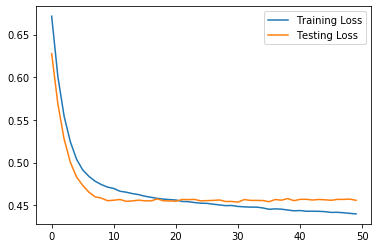

In [ ]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

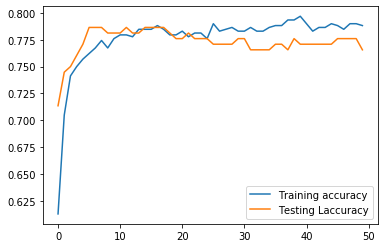

In [ ]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
plt.plot(train_loss, label='Training accuracy')
plt.plot(test_loss, label='Testing Laccuracy')
plt.legend()

### Wait, what tool am I even using, what's Keras?

<img align =left src="img/keras.png"><br>
### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](img/keras_2.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](img/cat-tensors.gif)

## TensorFlow at its start

An open-source library

![more-arch](img/layers.png)

### 2007 Keras was fully integrated into TensorFlow

It "comes with" Tensorflow and provides all the medium to high end API services to integrate with tensorflow processing.

![tensorflow-prog](img/tensorflow_programming_environment.png)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit mroe complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

## More levers and buttons

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](img/levers.jpeg)

### TensorFlow vs Keras example with Image Classification
[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) is a common benchmark in machine learning for image recognition. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

<img align =left src="img/c10imgcat.png">

<img align =left src="img/tf-logo3.png"><br>


This task can be accomplished in TensorFlow and the code can be found [here](https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10/). Let's look at it together. 

<img align =left src="img/keras.png"><br>

Now, the same task in [in Keras](https://keras.io/examples/cifar10_cnn/). After looking at it and comparing it to the tensorflow code, what do you notice? Any formatting look familiar?

# Another Problem: Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [ ]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# Splitting our data and initializing a Scaler
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)



In [ ]:
# Transforming our data



## Constructing a Neural Network in Keras

In [ ]:
# Importing model and layer types
model = Sequential()
model.add(Dense(30 , activation= 'relu', input_dim=30))
model.add(Dense(1, activation = 'sigmoid'))

# Importing our optimizer

from keras.optimizers import Adam

In [ ]:
# Constructing and compiling our model
# - 3 layers, first uses relu, second sigmoid
# - input layer and hidden layer have the same amount of nodes


# use the correct loss function for binary classification
adam = Adam()
model.compile(optimizer=adam, batch )

In [ ]:
# Fitting our model


# 50 epochs
# batch size 200
# use validation data when fitting your model

In [ ]:
# Storing that fit as a history log

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, verbose=0, batch_size=200)

In [ ]:
# Plotting our losses



In [ ]:
breast_canser_y_hat = model.predict_proba(X_test)

ValueError: Error when checking input: expected dense_13_input to have shape (8,) but got array with shape (30,)

## Appendix: Constructing a Neural Network in ("Base") Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
var_1 = tf.Variable(3)
var_2 = tf.Variable(2)

var_3 = var_1 * var_2
var_4 = var_1 + var_3 * var_2

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(var_4)

In [ ]:
print(result)

In [ ]:
X_train_scaled.shape

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)